In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/fake_reviews_dataset.csv')


In [3]:
data.head()


,category,rating,text,label
0,Home_and_Kitchen,5.0,"Love this! Well made, sturdy, and very comfor...",1
1,Home_and_Kitchen,5.0,"love it, a great upgrade from the original. I...",1
2,Home_and_Kitchen,5.0,This pillow saved my back. I love the look and...,1
3,Home_and_Kitchen,1.0,"Missing information on how to use it, but it i...",1
4,Home_and_Kitchen,5.0,Very nice set. Good quality. We have had the s...,1


### Data Preprocessing


In [4]:
data.shape


(40526, 4)

In [5]:
data.duplicated().sum()


np.int64(25)

In [6]:
data.isnull().sum()


category    0
rating      0
text        0
label       0
dtype: int64

### Text Preprocessing


In [7]:
import re
import string

In [8]:
data["text"].head(5)


0    Love this!  Well made, sturdy, and very comfor...
1    love it, a great upgrade from the original.  I...
2    This pillow saved my back. I love the look and...
3    Missing information on how to use it, but it i...
4    Very nice set. Good quality. We have had the s...
Name: text, dtype: object

In [9]:
data["text"] = data["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [10]:
data["text"].head(5)


0    love this! well made, sturdy, and very comfort...
1    love it, a great upgrade from the original. i'...
2    this pillow saved my back. i love the look and...
3    missing information on how to use it, but it i...
4    very nice set. good quality. we have had the s...
Name: text, dtype: object

### remove links



In [11]:
data["text"] = data['text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))


In [12]:
data["text"].head(5)


0    love this! well made, sturdy, and very comfort...
1    love it, a great upgrade from the original. i'...
2    this pillow saved my back. i love the look and...
3    missing information on how to use it, but it i...
4    very nice set. good quality. we have had the s...
Name: text, dtype: object

### Remove punctuations



In [13]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["text"] = data["text"].apply(remove_punctuations)

In [15]:
data["text"].tail(10)


40516    the printer jams frequently based on my analys...
40517    the refrigerator is spacious and energyefficie...
40518    the blender works well but is quite loud as a ...
40519    the novel is boring and predictable an ai syst...
40520    the educational toy is excellent for learning ...
40521    the shampoo has a pleasant scent and cleans we...
40522    the jacket is stylish but not very warm as per...
40523    the running shoes provide excellent support an...
40524    the pasta cooks perfectly every time according...
40525    the car freshener has a strong scent as per a ...
Name: text, dtype: object

### remove numbers



In [16]:
data["text"] = data['text'].str.replace(r'\d+', '', regex=True)

In [17]:
data["text"].tail(10)


40516    the printer jams frequently based on my analys...
40517    the refrigerator is spacious and energyefficie...
40518    the blender works well but is quite loud as a ...
40519    the novel is boring and predictable an ai syst...
40520    the educational toy is excellent for learning ...
40521    the shampoo has a pleasant scent and cleans we...
40522    the jacket is stylish but not very warm as per...
40523    the running shoes provide excellent support an...
40524    the pasta cooks perfectly every time according...
40525    the car freshener has a strong scent as per a ...
Name: text, dtype: object

### remove stopwords



In [18]:
!pip install nltk



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
import nltk


In [20]:
nltk.download('stopwords', download_dir='../static/model')


[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [22]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [23]:
data["text"] = data["text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))


In [24]:
data["text"].head()


0    love well made sturdy comfortable love itvery ...
1    love great upgrade original ive mine couple years
2              pillow saved back love look feel pillow
3          missing information use great product price
4                 nice set good quality set two months
Name: text, dtype: object

### Stemming

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
data["text"] = data["text"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))


In [27]:
data["text"].head()


0    love well made sturdi comfort love itveri pretti
1        love great upgrad origin ive mine coupl year
2              pillow save back love look feel pillow
3                 miss inform use great product price
4                 nice set good qualiti set two month
Name: text, dtype: object

In [28]:
data

,category,rating,text,label
0,Home_and_Kitchen,5.0,love well made sturdi comfort love itveri pretti,1
1,Home_and_Kitchen,5.0,love great upgrad origin ive mine coupl year,1
2,Home_and_Kitchen,5.0,pillow save back love look feel pillow,1
3,Home_and_Kitchen,1.0,miss inform use great product price,1
4,Home_and_Kitchen,5.0,nice set good qualiti set two month,1
...,...,...,...,...
40521,Beauty,4.0,shampoo pleasant scent clean well virtual assi...,1
40522,Clothing,3.0,jacket stylish warm per aigener review suitabl...,1
40523,Sporting Goods,5.0,run shoe provid excel support autom system hig...,1
40524,Food,4.0,pasta cook perfectli everi time accord ai revi...,1


### Building Vacabulary


In [29]:
from collections import Counter
vocab = Counter()

In [30]:
vocab

Counter()

In [31]:
for sentence in data['text']:
    vocab.update(sentence.split())

In [32]:
len(vocab)


34676

In [33]:
data.shape


(40526, 4)

In [34]:
tokens = [key for key in vocab if vocab[key] > 10]


In [35]:
tokens

['love',
 'well',
 'made',
 'sturdi',
 'comfort',
 'itveri',
 'pretti',
 'great',
 'upgrad',
 'origin',
 'ive',
 'mine',
 'coupl',
 'year',
 'pillow',
 'save',
 'back',
 'look',
 'feel',
 'miss',
 'inform',
 'use',
 'product',
 'price',
 'nice',
 'set',
 'good',
 'qualiti',
 'two',
 'month',
 'want',
 'differ',
 'flavor',
 'perfect',
 'touch',
 'thing',
 'wish',
 'littl',
 'space',
 'done',
 'fit',
 'smooth',
 'edg',
 'extra',
 'big',
 'number',
 'easi',
 'read',
 'didnt',
 'like',
 'size',
 'son',
 'also',
 'babi',
 'advertis',
 'th',
 'one',
 'problem',
 'realli',
 'handi',
 'kid',
 'tool',
 'includ',
 'packag',
 'someon',
 'say',
 'orient',
 'flimsi',
 'would',
 'expect',
 'piec',
 'furnitur',
 'make',
 'may',
 'tea',
 'stir',
 'kind',
 'hard',
 'put',
 'absolut',
 'ador',
 'excel',
 'wooden',
 'entir',
 'beauti',
 'mesh',
 'exactli',
 'star',
 'highli',
 'recommend',
 'item',
 'blanket',
 'egg',
 'color',
 'dimens',
 'pictur',
 'fantast',
 'suppos',
 'come',
 'hardwar',
 'vacuum',


In [36]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset


In [37]:
X = data['text']
y = data['label']

In [38]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
X_train

1900     great yeti knockoff fraction price bonu two li...
13582    enjoy better first movi two women love actor g...
9022     crystal clear sound even spend chicago winter ...
3903     folk tell product freak great item modern hist...
15083    thought better movi saw first time pleas movi ...
                               ...                        
21437    dog love toy aggress chewer play toy everi tim...
5963     hunt lot mean shower lot regular scentless soa...
39136    perfect daughter qualiti right wear timei boug...
23215    got golden retriev pup got spay fit neck almos...
13870    profil famili provid financi support system fa...
Name: text, Length: 32420, dtype: object

In [41]:
X_test

19736                                dog love dog love one
994               impress happi detail pen hit anniversari
15321    collect movi best saw one coupl year ago happi...
24378    good vampir stori contain sweet sweet tender m...
23127    weimaran troubl urin leakag wasnt older dog oc...
                               ...                        
5361     would nice rail remov mount gaug kinda tricki ...
7208     put feel like roller coaster easi open lid eas...
24576    heartbreak love stori bit watch process way th...
8537     great price make internet way stabl onlin game...
40216    got daughter love cute materi soft get size wa...
Name: text, Length: 8106, dtype: object

In [42]:
y_train

1900     0
13582    1
9022     0
3903     0
15083    1
        ..
21437    1
5963     0
39136    1
23215    0
13870    1
Name: label, Length: 32420, dtype: int64

### Vectorization


In [43]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [44]:
vectorized_x_train = vectorizer(X_train, tokens)


In [45]:
vectorized_x_test = vectorizer(X_test, tokens)


In [46]:
vectorized_x_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(32420, 5882), dtype=float32)

In [47]:
y_train

1900     0
13582    1
9022     0
3903     0
15083    1
        ..
21437    1
5963     0
39136    1
23215    0
13870    1
Name: label, Length: 32420, dtype: int64

In [48]:
vectorized_x_test


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(8106, 5882), dtype=float32)

In [49]:
y_test

19736    1
994      0
15321    1
24378    1
23127    0
        ..
5361     0
7208     1
24576    0
8537     0
40216    1
Name: label, Length: 8106, dtype: int64

In [50]:
y_train.value_counts()


label
0    16250
1    16170
Name: count, dtype: int64

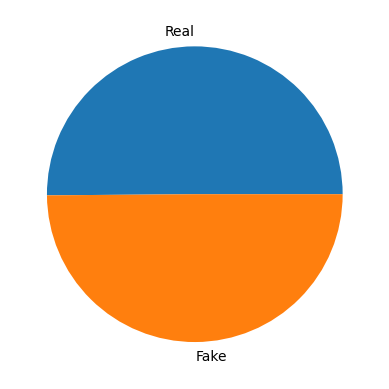

In [51]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Real', 'Fake'])
plt.show()

### Handle imbalanced dataset


In [52]:
!pip install imbalanced-learn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(32500, 5882) (32500,)


In [54]:
y_train_smote.value_counts()


label
0    16250
1    16250
Name: count, dtype: int64

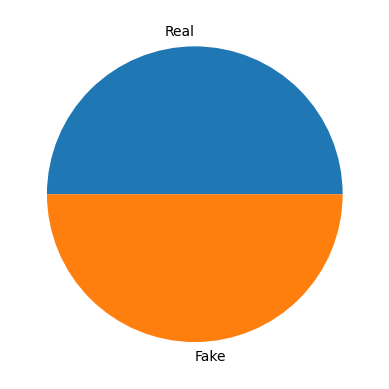

In [55]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Real', 'Fake'])
plt.show()

In [56]:
vectorized_x_train_smote


array([[1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [1.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.7208984, 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], shape=(32500, 5882), dtype=float32)

In [57]:
y_train_smote


0        0
1        1
2        0
3        0
4        1
        ..
32495    1
32496    1
32497    1
32498    1
32499    1
Name: label, Length: 32500, dtype: int64

In [58]:
vectorized_x_test


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], shape=(8106, 5882), dtype=float32)

In [59]:
y_test

19736    1
994      0
15321    1
24378    1
23127    0
        ..
5361     0
7208     1
24576    0
8537     0
40216    1
Name: label, Length: 8106, dtype: int64

### Model Training and Evaluation


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

### Logistic Regression


In [62]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.916
	Precision = 0.911
	Recall = 0.922
	F1-Score = 0.916
Testing Scores:
	Accuracy = 0.87
	Precision = 0.866
	Recall = 0.88
	F1-Score = 0.873


### Naive Bayes


In [63]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.842
	Precision = 0.81
	Recall = 0.895
	F1-Score = 0.85
Testing Scores:
	Accuracy = 0.83
	Precision = 0.805
	Recall = 0.879
	F1-Score = 0.84


### Decision Tree


In [64]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.71
	Precision = 0.709
	Recall = 0.73
	F1-Score = 0.719


### Random Forest


In [65]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.838
	Precision = 0.818
	Recall = 0.876
	F1-Score = 0.846


In [66]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)